Checking the columns provided in loan.csv dataset & checking the columns descriptions in Data\_Dictionary.xlsx provided, we can categorize data in three groups as below and consider accoridngly in our analysis.

**Customer Information:**

**Customer Credit Health & Payment Behaviour:**

**Loan Information:**



**Approach**

**Data Conversion:**

Converting needed object to int or float

Removing records instead of imputing as needed



# <u>Importing required libraries</u>



In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# <u>Sourcing loan data from loan.csv</u>



In [2]:
loan_data = pd.read_csv("loan.csv", low_memory=False)

# <u>Data Understanding</u>



In [3]:
# Checking rows and columns in dataset
loan_data.shape

(39717, 111)

In [4]:
# Checking general information about dataset, mostly to see various datatypes available in dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# Quick data view & also checking if any extra header rows present
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
# Checking if any extra rows present at bottom eg. total rows
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(loan_data.columns.tolist())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

---



## Removing ongoing loans records

#### Note:

While working with dataset, saw that we can remove the records for the ongoing loans \(loan\_status=Current\) due to below reasons

1. We cannot and should not predict will the customer default or fully pay loan in future
2. We can use the customer payment behaviour data of ongoing loans to predict possibility of loan default but that is not in the scope of the problem statement
3. Dataset of ongoing loans is also very low \(only 2%\)

We are removing all records with loan\_status == Current now itself before basic data cleaning as it reduces the dataset and it is helpful to clean data for standard things like all NULL, single value columns etc.

_eg. next\_pymnt\_d seems to be having data only for ongoing loans and seems hence NULL values for this column is above 90%, now after removing records of loan\_status= Current this column gets removed as part of removal of all NULL value columns_

<br/>

We encountered this issue while working further and have to redo all NULL, single value column removals hence decided to remove all ongoing/Current loan entries at start.



In [8]:
# Checking records as per loan_status, to see volume of ongoing loans compared to Fully Paid & Defaulted

print(loan_data['loan_status'].value_counts(dropna=False))

print("")
print("****************")
print("")

print(loan_data['loan_status'].value_counts(normalize=True, dropna=False) * 100)

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

****************

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64


In [9]:
# Ongoing loans are good to consider while analysing if person defaulted on loan due to multiple open loans
# But for doing so lets check if in data provided is any person having multiple loans
members_with_multiple_loans = loan_data[loan_data['member_id'].duplicated()]

members_with_multiple_loans


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


As there are no member\_id repeated means all loans are unique to customers as per data provided.

May be, if names or any other identification info was provided we may have been able to find one customer with multiple loans assuming customer was freshly created every time it was added to system as member\_id is unique.

But considering data as it is we will consider loans given to unique customers and hence we can remove ongoing loans as we cannot predict their outcome.


In [10]:
loan_data_before_removing_ongoing_loans = len(loan_data)
print("Before removing loan_status = Current records : "+str(loan_data_before_removing_ongoing_loans))

loan_data = loan_data[loan_data['loan_status'] != "Current"]

loan_data_after_removing_ongoing_loans = len(loan_data)

print("After removing loan_status = Current records : "+str(loan_data_after_removing_ongoing_loans))

total_ongoing_loans_removed = loan_data_before_removing_ongoing_loans-loan_data_after_removing_ongoing_loans

print("Total ongoing loans removed are "+str(total_ongoing_loans_removed)+", which is "+str(round((total_ongoing_loans_removed/loan_data_before_removing_ongoing_loans)*100, 2))+"% of total data")

Before removing loan_status = Current records : 39717
After removing loan_status = Current records : 38577
Total ongoing loans removed are 1140, which is 2.87% of total data


In [11]:
# Checking records after removing the loan_status = Current records
loan_data.shape

(38577, 111)

---



# <u>Data Cleaning : Starts Here</u>



## Fixing Rows \(Basic Sanity Checks\)



Considering output of head\(\) & tail\(\) we have below observations

- Data set is not having header rows or footer rows
- There are no total or subtotal rows as well
- There are no Column number indicator rows



In [12]:
# Checking if any blank rows in dataset
blank_rows = loan_data[loan_data.isnull().all(axis=1)]

# Print the blank rows
print(blank_rows)

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, tot

- There are no blank rows in data set as well



In [13]:
print(loan_data.duplicated().sum())

0


- There are no duplicate rows in data set



---



## Analysing & Removing Columns



### Basic sanity check on columns



- Missing Column Names : All columns seems to be having proper name provided
- Inconsistent column names : Columns names are consistent and with proper explanation of each column name provided in Data\_Dictionary.xlsx
- Unnecessary columns: No Unidentified columns or blank columns \(Null only are present but we can clean up later\)
- Misaligned columns: All rows are having properly arranged data in given columns, no misaligned columns



---



### Remove all 100% null columns



In [14]:
# Checking % of null present in all columns to see if any columns we can drop

null_percent_per_column = ((loan_data.isnull().sum() / len(loan_data)) * 100)

null_percent_per_column.round(2).sort_values(ascending=False)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

In [15]:
# Removing all NULL value columns
loan_data.dropna(axis = 1, how = 'all', inplace = True)

# Checking shape of loan_data after to verify if column count is as expected
loan_data.shape

(38577, 56)

---



### Analyse remaining columns to see % of null present in them and decide accordingly about their removal



In [16]:
null_percent_per_column = (loan_data.isnull().sum() / len(loan_data)) * 100

null_percent_per_column.round(2).sort_values(ascending=False)

mths_since_last_record        92.90
mths_since_last_delinq        64.56
desc                          32.47
emp_title                      6.19
emp_length                     2.68
pub_rec_bankruptcies           1.81
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.15
collections_12_mths_ex_med     0.15
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
sub_grade                      0.00
collection_recovery_fee        0.00
out_prncp                      0.00
out_prncp_inv                  0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
total_rec_prncp                0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
last_pymnt_amnt                0.00
term                           0.00
total_acc                      0.00
funded_amnt_inv                0.00
policy_code                 

__Deleting mths_since_last_record & mths_since_last_delinq__



__mths_since_last_record : The number of months since the last public record.__
<br>
Having 93% NULL values & seems to be last date when customer data was updated publicly which again is not much of value as per problem statement
<br><br>
__mths_since_last_delinq : The number of months since the borrower's last delinquency.__
<br>
Having 65% NULL values & seems to be having data of last time when customer defaulted in months.
<br>
Additionally in column description it is not mentioned if this column value for particular record was pulled when loan application was made or is it field updated after loan was sanctioned. Assuming the field is updated after loan is sanctioned to track the user payment behaviour and hence it will not add much value in our analysis hence removing it.


In [17]:
loan_data = loan_data.drop(columns=['mths_since_last_record', 'mths_since_last_delinq'])

print(loan_data.shape)

print(loan_data.columns.tolist())

(38577, 54)
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']


---



### Get all columns with single value and remove them as it will not help much in analysis

- Single value columns will not add much value in our analysis. So removing them.



In [18]:
# Get columns and number of unique values in loan_data
unique_value_counts_per_column = loan_data.nunique()

unique_value_counts_per_column.sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
out_prncp                         1
collections_12_mths_ex_med        1
out_prncp_inv                     1
pymnt_plan                        1
term                              2
loan_status                       2
pub_rec_bankruptcies              3
verification_status               3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                

In [19]:
single_value_columns = unique_value_counts_per_column[unique_value_counts_per_column == 1].index.tolist()

print(len(single_value_columns))

single_value_columns

11


['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [20]:
# Checking what is the single value in each column with only 1 unique, to see if its safe to delete the column (mostly ok to delete but cross checking)

for column in single_value_columns:
    print("Looking for column : "+column)
    print(loan_data[column].value_counts())
    print("")

Looking for column : pymnt_plan
n    38577
Name: pymnt_plan, dtype: int64

Looking for column : initial_list_status
f    38577
Name: initial_list_status, dtype: int64

Looking for column : out_prncp
0.0    38577
Name: out_prncp, dtype: int64

Looking for column : out_prncp_inv
0.0    38577
Name: out_prncp_inv, dtype: int64

Looking for column : collections_12_mths_ex_med
0.0    38521
Name: collections_12_mths_ex_med, dtype: int64

Looking for column : policy_code
1    38577
Name: policy_code, dtype: int64

Looking for column : application_type
INDIVIDUAL    38577
Name: application_type, dtype: int64

Looking for column : acc_now_delinq
0    38577
Name: acc_now_delinq, dtype: int64

Looking for column : chargeoff_within_12_mths
0.0    38521
Name: chargeoff_within_12_mths, dtype: int64

Looking for column : delinq_amnt
0    38577
Name: delinq_amnt, dtype: int64

Looking for column : tax_liens
0.0    38538
Name: tax_liens, dtype: int64



Checking the values in each single value column and as per description provided in data\_dictionary for the column it is ok to delete this columns


In [21]:
# Removing columns with single value from loan_data
loan_data = loan_data.drop(columns=single_value_columns)
                           
# Checking shape of loan_data after to verify if column count is as expected
loan_data.shape

(38577, 43)

---



### Remove columns with all unique values



In [22]:
# Get columns with all unique values
unique_value_columns = loan_data.columns[loan_data.nunique() == len(loan_data)]

unique_value_columns

Index(['id', 'member_id', 'url'], dtype='object')

Removing id, member\_id & url columns as they won't add much value for analysis.

We would have kept one unique value column for any future work of manipulating the entries on basis of unique value like updating or deleting, but not forecasting need of it as per problem statement of case study.


In [23]:
# Removing unqiue value columns

loan_data = loan_data.drop(columns=unique_value_columns)

In [24]:
# Checking shape of loan_data after to verify if column count is as expected
loan_data.shape


(38577, 40)

---



### Remove all columns which are not needed for analysis considering problem statement



In [25]:
print(loan_data.columns.tolist())

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies']


**Lending Club's investors dealing for the loan will not be of much value to us for analysis hence we can remove those columns.**

Columns: funded\_amnt\_inv, total\_pymnt\_inv 



In [26]:
# Removing funded_amnt_inv, total_pymnt_inv columns

loan_data = loan_data.drop(columns=['funded_amnt_inv', 'total_pymnt_inv'])

In [27]:
# Checking columns after removing funded_amnt_inv, total_pymnt_inv columns
print(loan_data.shape)
print(loan_data.columns.tolist())

(38577, 38)
['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies']


**total\_pymnt, total\_rec\_prncp, total\_rec\_int, total\_rec\_late\_fee**

- total\_pymnt : Payments received to date for total amount funded
- total\_rec\_prncp : Principal received to date
- total\_rec\_int : Interest received to date
- total\_rec\_late\_fee : Late fees received to date

This columns seems to highlight the latest collected amounts from customer & may be used by Lending Club for certain calculations.

This columns mostly provides the post loan sanction payment behaviour of customer and may be used to generate understanding of possible defaults but considering our case study requirement, do not feel much value to consider them in analysis hence removing them

<br/>

**recoveries, collection\_recovery\_fee**

- recoveries : post charge off gross recovery
- collection\_recovery\_fee : post charge off collection fee

Columns provides the investment went in recovery of charge off loans, this columns won't be adding value to our analysis hence removing them

<br/>

**last\_pymnt\_d, last\_pymnt\_amnt**

- last\_pymnt\_d : Last month payment was received
- last\_pymnt\_amnt: Last total payment amount received

This columns provide the last date of payments which is of not much value for our analysis hence removing them

<br/>

**last\_credit\_pull\_d**

- last\_credit\_pull\_d : The most recent month LC pulled credit for this loan

Columns mentions month when Lending Club pulled credit of the loan but this won't help much in our analysis hence removing it



In [28]:
# Removing columns in above markdown description

loan_data = loan_data.drop(columns=['total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'])

In [29]:
# Checking columns after above column removals
print(loan_data.shape)
print(loan_data.columns.tolist())

(38577, 29)
['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies']


**column, desc vs purpose**

- desc : Loan description provided by the borrower
- purpose: A category provided by the borrower for the loan request

desc column is having 32% NULL, whereas purpose is having 0% NULL

As purpose column is there we can use it for analysis instead of desc, so removing desc column.

desc column may be more helpful to get insight in defaulted loans to find if any customer provided misleading purpose for the loan but considering our case study requirement we can skip desc column



In [30]:
# Removing desc column

loan_data = loan_data.drop(columns=['desc'])

In [31]:
# Checking columns after removing desc column
print(loan_data.shape)
print(loan_data.columns.tolist())

(38577, 28)
['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies']


###### Removing fields below

###### sub\_grade : its part of grade variable, doesn't help much in analysis

addr\_state : this is part data for zip\_code, so keeping zip\_code, removing addr\_state


In [32]:
loan_data['addr_state'].value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

In [33]:
# FOR DEBUGGINGb
loan_data_backup = loan_data.copy()

In [34]:
#loan_data = loan_data_backup

---

## Outlier Treatment

In [35]:
# Common function to check the outliers for the columns

def box_plot_for_outlier_check(data, column):
    fig, ax = plt.subplots(figsize=(14, 3))
    ax.boxplot(data[column], vert=False)
    ax.set_title('Box Plot of '+ column)
    plt.show()

In [36]:
rows_before_removing_outliers = len(loan_data)
print("Total rows before removing Outliers : "+str(rows_before_removing_outliers))

Total rows before removing Outliers : 38577


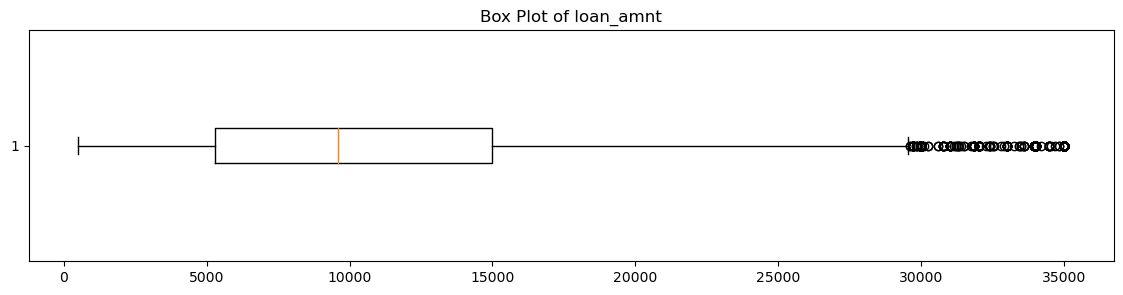

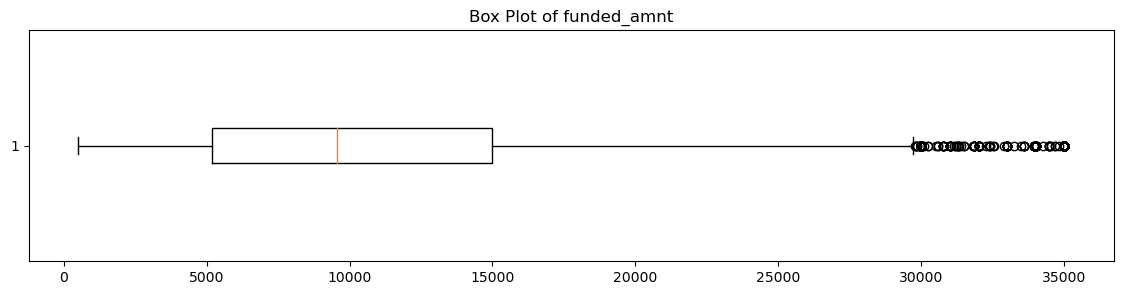

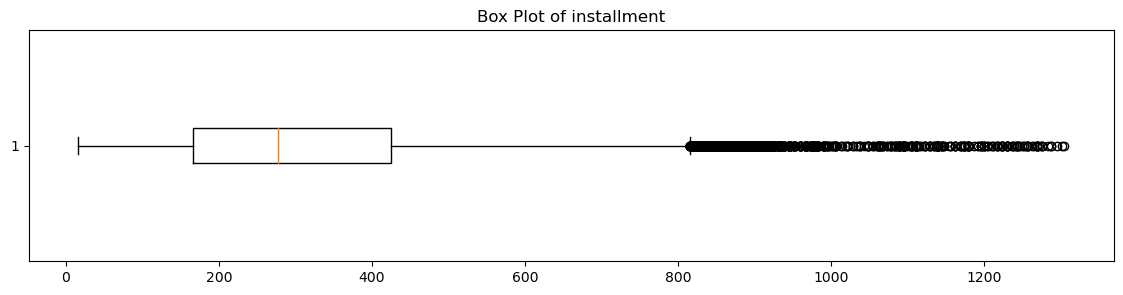

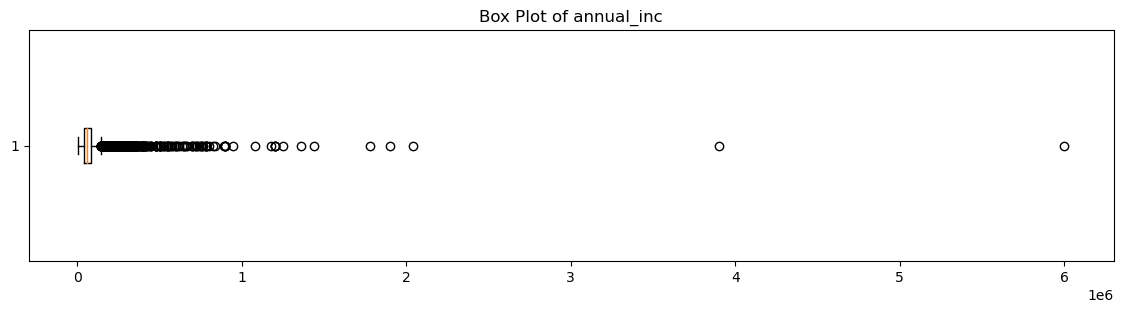

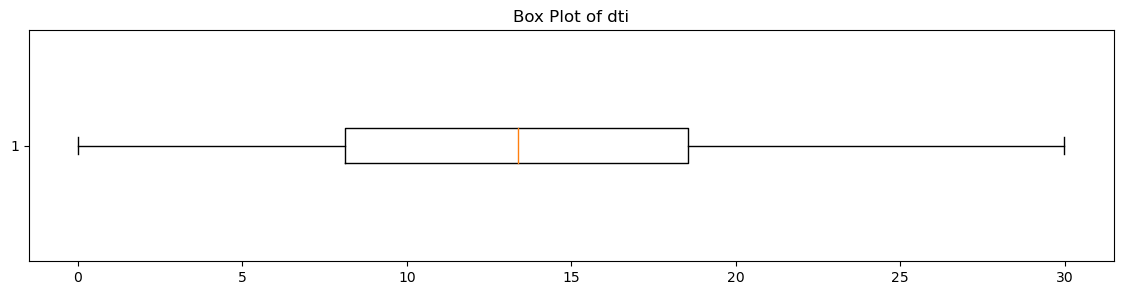

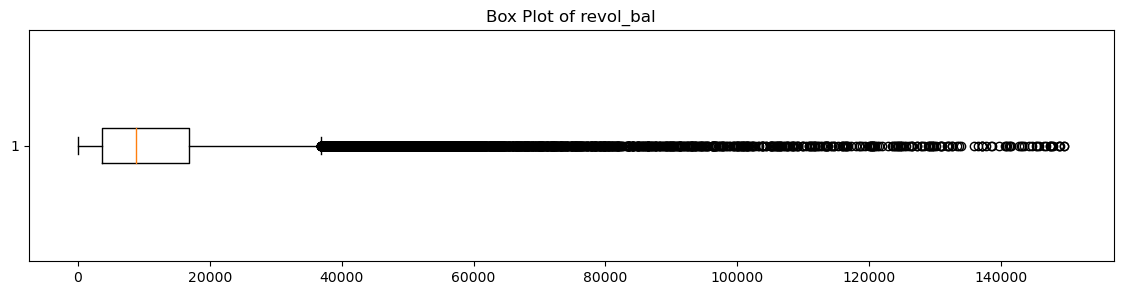

In [37]:
# Checking outliers for columns
# outlier_treatment = ['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util']
outlier_treatment = ['loan_amnt', 'funded_amnt', 'installment', 'annual_inc', 'dti', 'revol_bal']
for column in outlier_treatment:
    box_plot_for_outlier_check(loan_data, column)


For most of the columns except annual_inc there are some values far from distribution, the distribution is pretty continous and there is no need to remove outliers for the columns.
<br><br>
Will remove the outlier for annual_inc

__Checking outliers in annual_inc__

In [38]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

Clearly we are seeing outliers
<br>
Will check the quantile info, values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
<br>
So, considering threshold for removing outliers as 0.95

In [39]:
annual_inc_at_95_percent = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= annual_inc_at_95_percent]

<AxesSubplot:xlabel='annual_inc'>

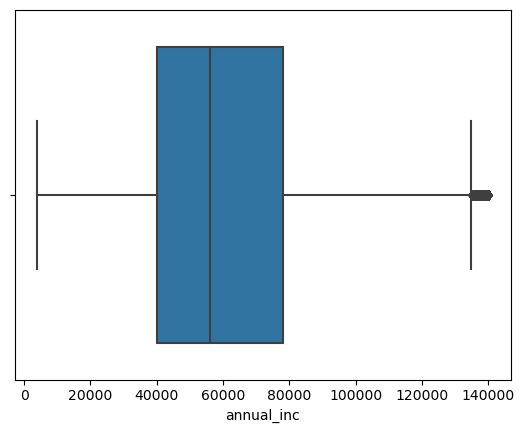

In [40]:
sns.boxplot(loan_data.annual_inc)

annual_inc columns seems better now

In [41]:
rows_after_removing_outliers = len(loan_data)
print("Total rows after removing Outliers : "+str(rows_after_removing_outliers))

print("In total "+str(rows_before_removing_outliers-rows_after_removing_outliers)+" rows are removed while outlier cleanup")

Total rows after removing Outliers : 36654
In total 1923 rows are removed while outlier cleanup


---

## Data Conversion



In [42]:
# Checking datatype of the remaining columns
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36654 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36654 non-null  int64  
 1   funded_amnt           36654 non-null  int64  
 2   term                  36654 non-null  object 
 3   int_rate              36654 non-null  object 
 4   installment           36654 non-null  float64
 5   grade                 36654 non-null  object 
 6   sub_grade             36654 non-null  object 
 7   emp_title             34451 non-null  object 
 8   emp_length            35640 non-null  object 
 9   home_ownership        36654 non-null  object 
 10  annual_inc            36654 non-null  float64
 11  verification_status   36654 non-null  object 
 12  issue_d               36654 non-null  object 
 13  loan_status           36654 non-null  object 
 14  purpose               36654 non-null  object 
 15  title              

#### Data Conversion for column : term



In [43]:
# Data conversion for column : term

print("term column before data conversion")
print(loan_data['term'].value_counts(dropna=False))

# Extracting only number from string
loan_data['term'] = loan_data['term'].str.extract(r'(\d+)').astype(int)

print("")

print("term column after data conversion")
print(loan_data['term'].value_counts(dropna=False))

print("")

print("term column data type after conversion is : "+str(loan_data['term'].dtype))

term column before data conversion
 36 months    27721
 60 months     8933
Name: term, dtype: int64

term column after data conversion
36    27721
60     8933
Name: term, dtype: int64

term column data type after conversion is : int64


#### Data Conversion for column : int\_rate



In [44]:
# Data conversion for column : int_rate

print("int_rate column before data conversion")
print(loan_data['int_rate'].value_counts(dropna=False))

# Removing last % from int_rate
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: float(x[:-1]))


print("")

print("int_rate column after data conversion")
print(loan_data['int_rate'].value_counts(dropna=False))

print("")

print("int_rate column data type after conversion is : "+str(loan_data['int_rate'].dtype))

int_rate column before data conversion
10.99%    863
7.51%     768
11.49%    756
13.49%    722
7.88%     702
         ... 
16.71%      1
16.01%      1
24.40%      1
18.36%      1
15.01%      1
Name: int_rate, Length: 370, dtype: int64

int_rate column after data conversion
10.99    863
7.51     768
11.49    756
13.49    722
7.88     702
        ... 
16.71      1
16.01      1
24.40      1
18.36      1
15.01      1
Name: int_rate, Length: 370, dtype: int64

int_rate column data type after conversion is : float64


#### Data Conversion for column : emp\_length



In [45]:
# Data conversion for column : emp_length

print("emp_length column before data conversion")
loan_data['emp_length'].value_counts(dropna=False)

emp_length column before data conversion


10+ years    7888
< 1 year     4327
2 years      4101
3 years      3824
4 years      3200
5 years      3044
1 year       3043
6 years      2073
7 years      1644
8 years      1343
9 years      1153
NaN          1014
Name: emp_length, dtype: int64

In [46]:
print("% of NULL rows for emp_length is "+str((loan_data['emp_length'].isnull().sum()/len(loan_data))*100))
print("Mode of emp_length column is "+str(loan_data['emp_length'].mode().values[0]))

# Checking how many Charged Off loans records are getting deleted if we remove entries where emp_length is NAN
print("Total Charged Off loan records having NAN emp_length : "+str(len(loan_data[(loan_data['loan_status']=='Charged Off') & (loan_data['emp_length'].isna())])))
print("Total Charged Off loan records having NAN emp_length : "+str(len(loan_data[(loan_data['loan_status']=='Fully Paid') & (loan_data['emp_length'].isna())])))

% of NULL rows for emp_length is 2.7664102144377147
Mode of emp_length column is 10+ years
Total Charged Off loan records having NAN emp_length : 225
Total Charged Off loan records having NAN emp_length : 789


Dropping rows with NAN emp_length will lead to deletion of Charged Off loan records which can be substantial data for us to analyse in our case study.

Inputing emp_length with mode which is 10\+ years would be wrong as we are assuming all customers without emp_length are having working exp of more than 10 years.

Hence considering filling the records with -1 years and in analysis we can skip -1 years data


In [47]:
loan_data['emp_length'] = loan_data['emp_length'].fillna("-1 years")

In [48]:
# Converting emp_length as int, considering <1 years exp as 0, 1 year as 1, 2 year as 2 so on & 10+ years as 10
loan_data['emp_length'] = loan_data['emp_length'].replace({'-1 years': -1, '< 1 year': 0, '2 years': 2, '3 years': 3, 
                                                         '7 years': 7, '4 years': 4, '5 years': 5, 
                                                         '1 year': 1, '6 years': 6, '8 years': 8, 
                                                         '9 years': 9,  '10+ years': 10})

print(loan_data['emp_length'].value_counts(dropna=False))

print("")

print("emp_length column data type after conversion is : "+str(loan_data['emp_length'].dtype))

 10    7888
 0     4327
 2     4101
 3     3824
 4     3200
 5     3044
 1     3043
 6     2073
 7     1644
 8     1343
 9     1153
-1     1014
Name: emp_length, dtype: int64

emp_length column data type after conversion is : int64


#### Data Conversion for column : issue\_d



In [49]:
# Converting issue_d column from string object to DateTime
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')

print("")

print("issue_d column data type after conversion is : "+str(loan_data['issue_d'].dtype))


issue_d column data type after conversion is : datetime64[ns]


---



### Derived Columns



- Deriving month & year from issue\_d column



In [50]:
# Deriving month & year from issue_d column

# Adding additional column for Year and Month for analysis extrating Year and Month from issue_d
# Below was giving warning 'Try using .loc[row_indexer,col_indexer] = value instead' hence changed logic

loan_data['issue_year'] = pd.DatetimeIndex(loan_data['issue_d']).year
loan_data['issue_month'] = pd.DatetimeIndex(loan_data['issue_d']).month

---



##### Bucketing certain columns for proper analysis while doing univariate, bivariate analysis



- Bucketing records in quarters as per derived issue\_month column for usage in univariate, bivariate analysis



In [51]:
# Bucketing records in quarters as per dervied issue_month column for usage in univariate, bivariate analysis

# Using quarters as per calendar months, not as per Indian or US financial years
# Q1 : Jan, Feb, Mar
# Q2 : Apr, May, Jun
# Q3 : Jul, Aug, Sep
# Q4 : Oct, Nov, Dec
def bucket_records_in_quarters(column):
    if column < 4:
        return 'Q1' 
    elif (column >= 4) and (column < 7):
        return 'Q2'      
    elif (column >= 7) and (column < 9):
        return 'Q3'  
    else:
        return 'Q4'
    
loan_data['issue_quarter'] = loan_data.apply(lambda x : bucket_records_in_quarters(x['issue_month']), axis = 1)

In [52]:
loan_data[['issue_d','issue_year','issue_month','issue_quarter']].value_counts()

issue_d     issue_year  issue_month  issue_quarter
2011-12-01  2011        12           Q4               1967
2011-11-01  2011        11           Q4               1961
2011-10-01  2011        10           Q4               1810
2011-09-01  2011        9            Q4               1790
2011-08-01  2011        8            Q3               1700
2011-07-01  2011        7            Q3               1652
2011-06-01  2011        6            Q2               1617
2011-05-01  2011        5            Q2               1528
2011-04-01  2011        4            Q2               1496
2011-03-01  2011        3            Q1               1363
2011-01-01  2011        1            Q1               1321
2011-02-01  2011        2            Q1               1241
2010-12-01  2010        12           Q4               1210
2010-07-01  2010        7            Q3               1084
2010-11-01  2010        11           Q4               1076
2010-10-01  2010        10           Q4               1075
2010-

---



In [53]:
# Common function to bucket the column

def bucket_columns(column_name, bucketed_column_name, bin_edges, labels):
    loan_data[bucketed_column_name] = pd.cut(loan_data[column_name], bins=bin_edges, labels=labels)
    
    # Verifying if group is done properly by checking max & min in each bucket
    grouped_data = loan_data.groupby(bucketed_column_name)[column_name].agg(['min', 'max'])

    print(grouped_data)

- Bucketing loan\_amnt column for usage in univariate, bivariate analysis



In [54]:
loan_data['loan_amnt'].describe()

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [55]:
# Bucketting loan_amnt
bin_edges = [0, 5000, 10000, 15000, max(loan_data['loan_amnt'])]
labels = ['0-5K', '5K-10K', '10K-15K', '15K & Above']
# Using custom function 'bucket_columns' defined above to bucket the columns
bucket_columns('loan_amnt', 'loan_amnt_bucket', bin_edges, labels)

                    min    max
loan_amnt_bucket              
0-5K                500   5000
5K-10K             5025  10000
10K-15K           10025  15000
15K & Above       15025  35000


---



- Bucketing funded\_amnt column for usage in univariate, bivariate analysis



In [56]:
loan_data['funded_amnt'].describe()

count    36654.000000
mean     10436.144077
std       6800.636737
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [57]:
# Bucketting funded_amnt

bin_edges = [0, 5000, 10000, 15000, max(loan_data['funded_amnt'])]
labels = ['0-5K', '5K-10K', '10K-15K', '15K & Above']
# Using custom function 'bucket_columns' defined above to bucket the columns
bucket_columns('funded_amnt', 'funded_amnt_bucket', bin_edges, labels)

                      min    max
funded_amnt_bucket              
0-5K                  500   5000
5K-10K               5025  10000
10K-15K             10025  15000
15K & Above         15025  35000


---



- Bucketing int\_rate column for usage in univariate, bivariate analysis



In [58]:
loan_data['int_rate'].describe()

count    36654.000000
mean        11.888080
std          3.667257
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

In [59]:
# Bucketting int_rate

bin_edges = [0, 9, 11, 14, max(loan_data['int_rate'])]
labels = ['Low', 'Medium', 'High', 'Very High']
# Using custom function 'bucket_columns' defined above to bucket the columns
bucket_columns('int_rate', 'int_rate_bucket', bin_edges, labels)

                   min    max
int_rate_bucket              
Low               5.42   8.94
Medium            9.01  10.99
High             11.03  13.99
Very High        14.07  24.40


---



- Bucketing annual\_inc column for usage in univariate, bivariate analysis



In [60]:
loan_data['annual_inc'].describe() / 1000

count     36.654000
mean      60.855752
std       27.750284
min        4.000000
25%       40.000000
50%       56.000000
75%       77.970500
max      140.004000
Name: annual_inc, dtype: float64

In [61]:
# Bucketting annual_inc

bin_edges = [0, 40000, 50000, 60000, 70000, 80000, max(loan_data['annual_inc'])]
labels = ['0 - 40K', '40K - 50K', '50K - 60K', '60K - 70K', '70K - 80K', '80K & Above']
# Using custom function 'bucket_columns' defined above to bucket the columns
bucket_columns('annual_inc', 'annual_inc_bucket', bin_edges, labels)

                        min       max
annual_inc_bucket                    
0 - 40K             4000.00   40000.0
40K - 50K          40008.00   50000.0
50K - 60K          50000.04   60000.0
60K - 70K          60008.00   70000.0
70K - 80K          70001.00   80000.0
80K & Above        80004.00  140004.0


---



- Bucketing dti column for usage in univariate, bivariate analysis



In [62]:
loan_data['dti'].describe()

count    36654.000000
mean        13.446725
std          6.661899
min          0.000000
25%          8.350000
50%         13.580000
75%         18.710000
max         29.990000
Name: dti, dtype: float64

In [63]:
# Bucketting dti

bin_edges = [0, 8, 13, 18, max(loan_data['int_rate'])]
labels = ['Low', 'Medium', 'High', 'Very High']
# Using custom function 'bucket_columns' defined above to bucket the columns
bucket_columns('dti', 'dti_bucket', bin_edges, labels)

              min   max
dti_bucket             
Low          0.01   8.0
Medium       8.01  13.0
High        13.01  18.0
Very High   18.01  24.4


---



# <u>Data Cleaning : Ends Here</u>



---



In [64]:
# Printing column info to see data after data cleanup

print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36654 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36654 non-null  int64         
 1   funded_amnt           36654 non-null  int64         
 2   term                  36654 non-null  int64         
 3   int_rate              36654 non-null  float64       
 4   installment           36654 non-null  float64       
 5   grade                 36654 non-null  object        
 6   sub_grade             36654 non-null  object        
 7   emp_title             34451 non-null  object        
 8   emp_length            36654 non-null  int64         
 9   home_ownership        36654 non-null  object        
 10  annual_inc            36654 non-null  float64       
 11  verification_status   36654 non-null  object        
 12  issue_d               36654 non-null  datetime64[ns]
 13  loan_status     

# <u>Data Analysis : Starts Here</u>



## Univariate Analysis



### Common Functions to be used in analysis

In [75]:
# Function to plot density histogram & Box Plot for column for Univariate Analysis of Quantative Variables
def univariate_quantvar_analysis(column):
    
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sns.boxplot(x=column, data=loan_data, ax=p[0])
    sns.distplot(loan_data.loc[loan_data[column].notnull(), column], kde=True, hist=True, ax=p[1], color='green')
    p[0].set_xlabel(column)
    p[1].set_xlabel(column)
    plt.tight_layout()
    plt.show()    
    print()
    print(loan_data[column].describe())
    print()
    print("Median is : "+str(loan_data[column].median()))
    
# Function to bar chart for Univariate Analysis of Categorical Variables
def univariate_catvar_analysis(column): 
    loan_data[column].value_counts().plot.bar()
    plt.show()


-----

## Univariate Analysis - Quantitative Variables

### Column: loan_amnt

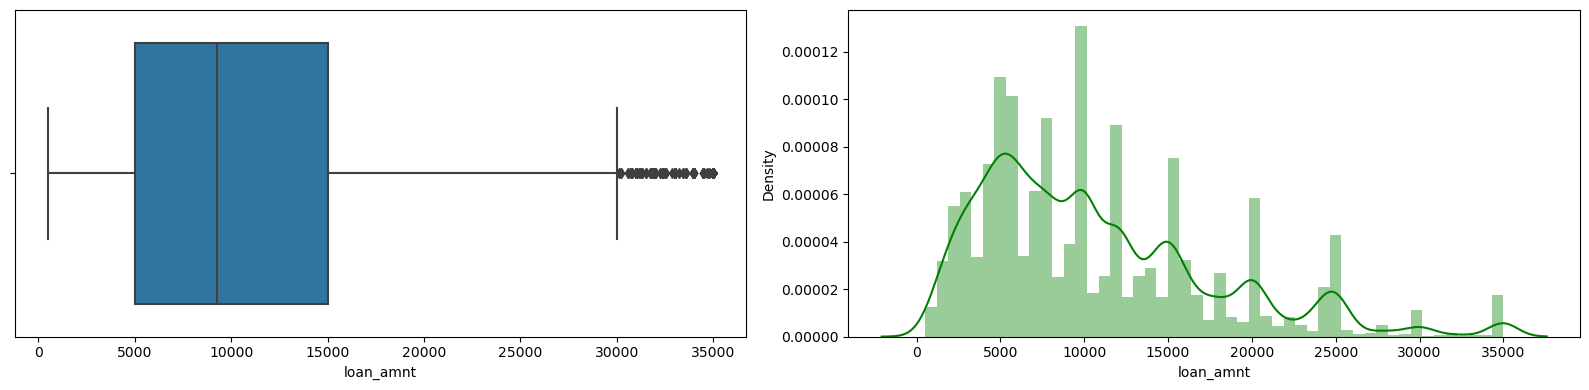


count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Median is : 9250.0


In [66]:
univariate_quantvar_analysis('loan_amnt')

__Analysis:__
<br>
- Most of the loan_amnt is in the range of 5K to 15K
- We can see spikes around round figure 5000, 10000, 15000, 20000, 25000, 30000, 35000 which is obvious as mostly people look for loans around round figures
- Average loan_amnt is 10682 and Median is 99250

------

### Column : funded_amnt

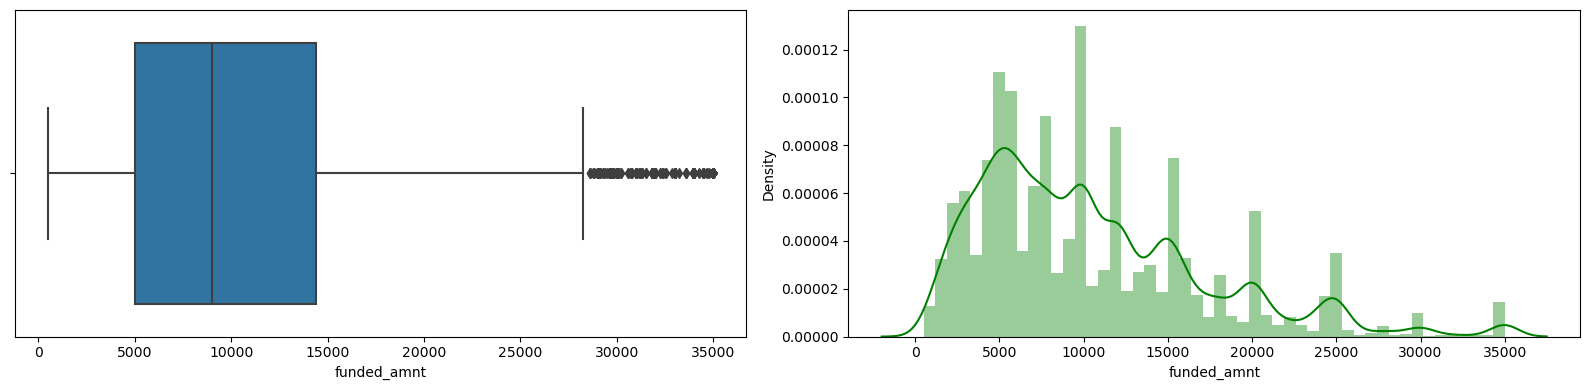


count    36654.000000
mean     10436.144077
std       6800.636737
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt, dtype: float64

Median is : 9000.0


In [67]:
univariate_quantvar_analysis('funded_amnt')

__Analysis:__
<br>
- Most of the funded_amnt is in the range of 5K to 15K
- We can see spikes around round figure 5000, 10000, 15000, 20000, 25000, 30000, 35000 which is obvious as mostly people look for loans around round figures
- Average funded_amnt is 10436 and Median is 9000

---



### Column : int_rate

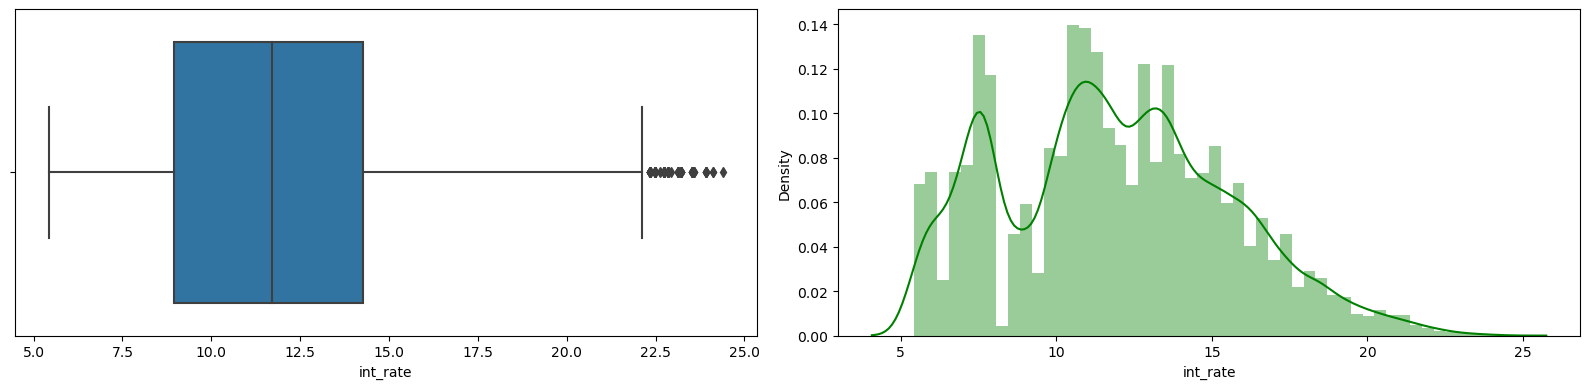


count    36654.000000
mean        11.888080
std          3.667257
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

Median is : 11.71


In [68]:
univariate_quantvar_analysis('int_rate')

__Analysis:__
<br>
- Majority of the interest rate is in the range of 5% to 14% going at the max to 24%
- Average int_rate is 11.88% and Median is 11.71%

------

### Column : installment

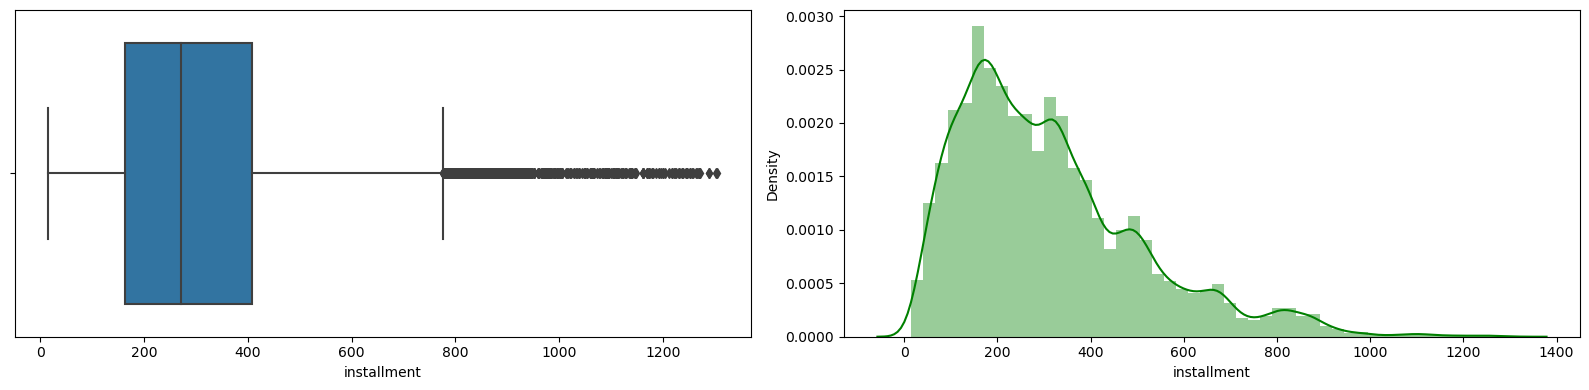


count    36654.000000
mean       311.888682
std        199.230096
min         15.690000
25%        163.080000
50%        270.420000
75%        408.480000
max       1305.190000
Name: installment, dtype: float64

Median is : 270.42


In [69]:
univariate_quantvar_analysis('installment')

__Analysis:__
<br>
- Most of the installment are in the range of 160 to 400
- Average int_rate is 311.88 and Median is 270.42

----

### Column : annual_inc

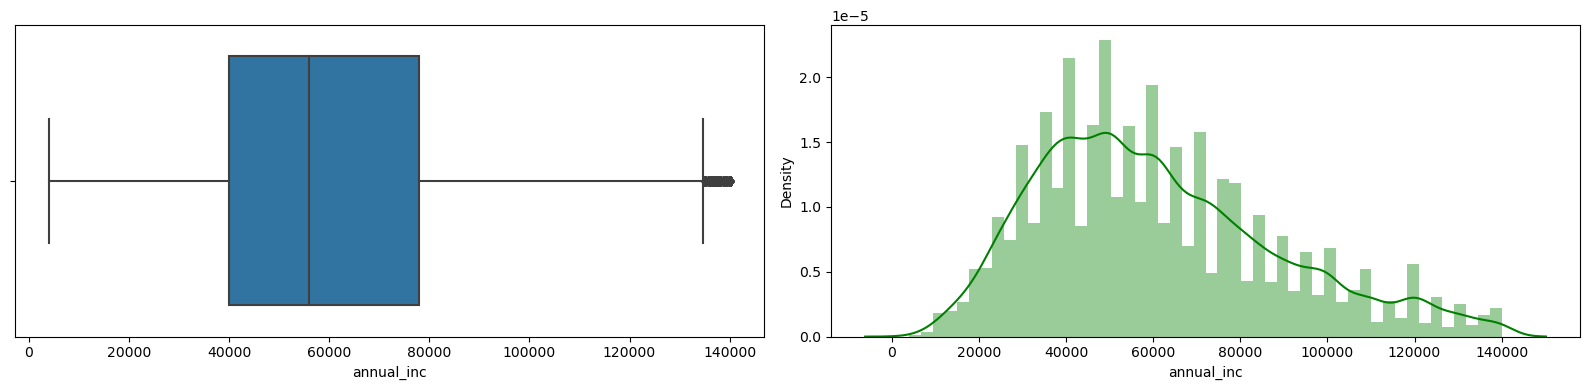


count     36654.000000
mean      60855.751621
std       27750.284125
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
max      140004.000000
Name: annual_inc, dtype: float64

Median is : 56000.0


In [70]:
univariate_quantvar_analysis('annual_inc')

__Analysis:__
<br>
- Majorly customer annual income is between 40000 to 78000
- Average annual_inc is 60855.75 and Median is 56000.0

----

### Column : dti

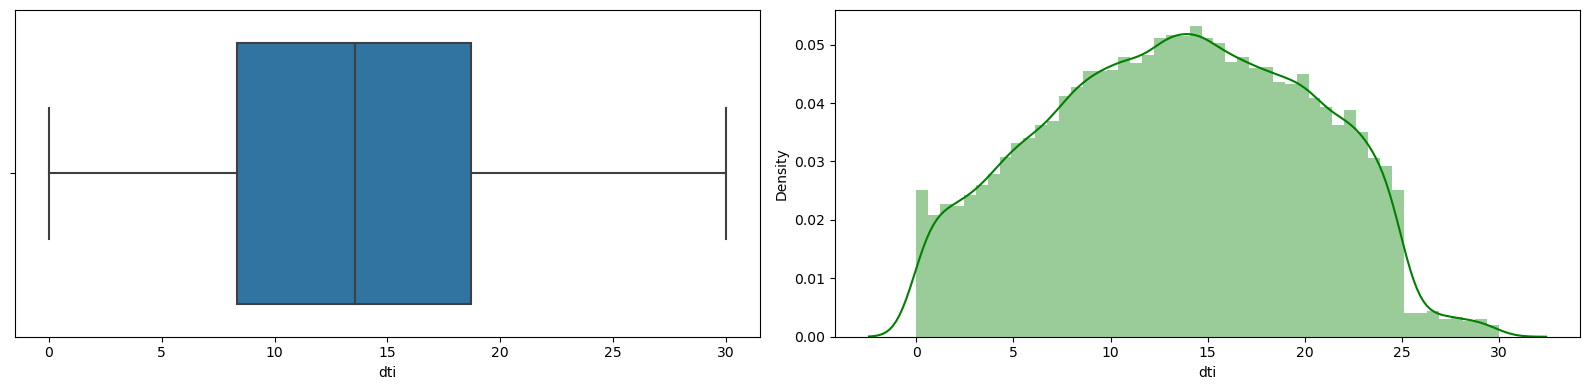


count    36654.000000
mean        13.446725
std          6.661899
min          0.000000
25%          8.350000
50%         13.580000
75%         18.710000
max         29.990000
Name: dti, dtype: float64

Median is : 13.58


In [71]:
univariate_quantvar_analysis('dti')

__Analysis:__
<br>
- Majorly dti is ranging between 8 to 18
- Average income is 13.44 and Median is 13.58
- We can see sharp drop in dti after 25

----

## Univariate Analysis - Categorical Variables

### Column : grade

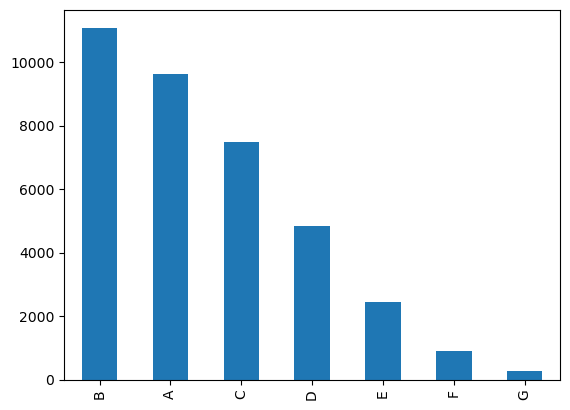

In [77]:
univariate_catvar_analysis('grade')

__Analysis:__
<br>
- Majority of loan application fall under Grade B

-----

### Column : sub_grade

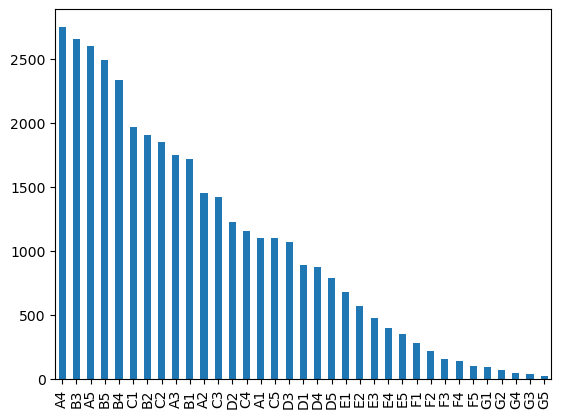

In [80]:
univariate_catvar_analysis('sub_grade')

__Analysis:__
<br>
- Majority of loan application fall under Grade B

-----

### Column : home_ownership

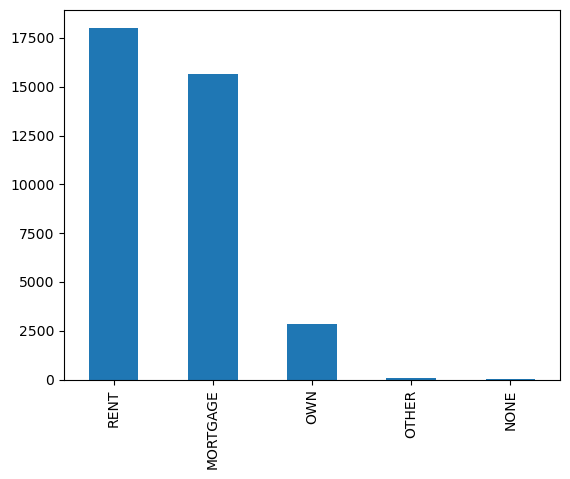

In [79]:
univariate_catvar_analysis('home_ownership')

__Analysis:__
<br>
- Customers on rent and mortgage tend to opt for loans more than those owing house

-----